# 선형회귀

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import timedelta
import statsmodels.api as sm
from dateutil.relativedelta import relativedelta

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KDT/환율데이터/2019.csv')
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.set_index('날짜')
df

,환율,EUR_KRW,GBP_KRW,JPY_KRW,EUR_USD,GBP_USD,JPY_USD,다우존스,S&P500,나스닥,...,미국국채금리6개월,미국국채금리1년,미국국채금리3년,미국국채금리5년,미국국채금리10년,금,은,천연가스,WTI,KOSPI지수
날짜,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1118.1,1276.199951,1420.099976,10.150000,1.146171,1.275429,0.009118,23346.240234,2510.030029,6665.939941,...,2.51,2.60,2.47,2.49,2.66,1281.000000,15.542000,2.958,46.31,2010.00
2019-01-03,1119.0,1269.400024,1404.800049,10.443000,1.131811,1.252191,0.009307,22686.220703,2447.889893,6463.500000,...,2.47,2.50,2.35,2.37,2.56,1291.800049,15.706000,2.945,46.92,1993.70
2019-01-04,1127.5,1280.199951,1419.199951,10.422000,1.139108,1.262881,0.009276,23433.160156,2531.939941,6738.859863,...,2.51,2.57,2.47,2.49,2.67,1282.699951,15.695000,3.044,47.76,2010.25
2019-01-07,1125.2,1271.199951,1419.400024,10.265000,1.141044,1.273496,0.009215,23531.349609,2549.689941,6823.470215,...,2.54,2.58,2.51,2.53,2.70,1286.800049,15.669000,2.944,48.27,2037.10
2019-01-08,1118.0,1281.199951,1427.300049,10.278000,1.147974,1.278609,0.009207,23787.449219,2574.409912,6897.000000,...,2.54,2.60,2.57,2.58,2.73,1283.199951,15.626000,2.967,49.58,2025.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15,1376.3,1469.267334,1781.827881,8.679485,1.088554,1.296680,0.006317,40211.718750,5631.220215,18472.570312,...,5.23,4.85,4.23,4.13,4.23,2422.899902,30.672001,2.158,83.22,2860.92
2024-07-16,1381.9,1507.609985,1794.552856,8.749447,1.090156,1.297000,0.006323,40954.480469,5667.200195,18509.339844,...,5.23,4.85,4.21,4.09,4.17,2462.399902,31.195000,2.188,83.22,2866.09
2024-07-17,1386.0,1506.310059,1794.226562,8.731158,1.090251,1.297769,0.006315,41198.078125,5588.270020,17996.919922,...,5.23,4.85,4.19,4.07,4.16,2454.800049,30.136999,2.035,83.22,2843.29


In [ ]:
#df.info()

array([[ 1.42793597,  1.5988523 , -0.2697269 ,  0.47590444,  0.64304125,
        -0.11158843,  1.24156951,  1.30936319,  1.20215672,  1.18602142,
         1.27656957,  0.48623473,  1.73864069,  0.58005669,  1.1326087 ,
         1.0105042 ,  0.89692982,  0.91079812,  0.97587131,  1.51559713,
         1.04183878,  0.06745549,  0.74835014,  0.74998512],
       [ 1.45109922,  1.59450457, -0.2152307 ,  0.48963586,  0.65154614,
        -0.07650764,  1.21229299,  1.29229503,  1.18905478,  1.19248348,
         1.26602798,  0.43846144,  1.6698356 ,  0.59708135,  1.1326087 ,
         1.01260504,  0.90789474,  0.92018779,  0.98659517,  1.51176179,
         1.03379947,  0.07843376,  0.74835014,  0.73973381],
       [ 1.44825724,  1.58810953, -0.2409345 ,  0.46993728,  0.6356105 ,
        -0.09973862,  1.19156067,  1.27682517,  1.17401599,  1.17421178,
         1.24267816,  0.43400813,  1.66540415,  0.60640455,  1.1326087 ,
         1.01260504,  0.90789474,  0.92018779,  0.98659517,  1.43978525,
  

In [ ]:
#df.describe()

In [ ]:
#sns.histplot(df.환율)

In [ ]:
#sns.pairplot(df)

In [ ]:
#df.corr()

In [ ]:
X = df.drop(columns=['환율'])
y = df['환율']

In [ ]:
#데이터셋 나누기
train_size = int(len(X) * 0.7)
valid_size = int(len(X) * 0.2)
test_size = len(X) - train_size - valid_size

X_train = X[0:train_size]
y_train = y[0:train_size]
X_valid = X[train_size:train_size + valid_size]
y_valid = y[train_size:train_size + valid_size]
X_test = X[train_size + valid_size:len(X)]
y_test = y[train_size + valid_size:len(X)]

In [ ]:
#Min-Max Scaling 적용
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

X_valid_scaled = scaler_X.transform(X_valid)
y_valid_scaled = scaler_y.transform(y_valid.values.reshape(-1, 1))

degrees = [1, 2, 3]
validation_errors = []

#최적의 차수 선택코드, 실행안해도됨
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_valid_poly = poly.transform(X_valid_scaled)

    X_train_poly = sm.add_constant(X_train_poly)
    X_valid_poly = sm.add_constant(X_valid_poly)

    model = sm.OLS(y_train_scaled, X_train_poly).fit()

    y_valid_pred_scaled = model.predict(X_valid_poly)

    y_valid_pred = scaler_y.inverse_transform(y_valid_pred_scaled.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
    validation_errors.append(rmse)

    print(f"Degree: {degree}, RMSE: {rmse}")

# 최적의 차수 선택
optimal_degree = degrees[np.argmin(validation_errors)]
print(f"Optimal degree: {optimal_degree}")

# 최적의 차수 = 1로나옴

Degree: 1, RMSE: 26.34202936193601
Degree: 2, RMSE: 92.95988591706585
Degree: 3, RMSE: 1870.7171667459188
Optimal degree: 1


In [ ]:
# Min-Max Scaling 적용
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_train)
y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# 상수항추가
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y_scaled, X_scaled).fit()

In [ ]:
# 다음 30일의 날짜 생성
last_date = df.index[-1]
prediction_dates = [last_date + timedelta(days=x) for x in range(1, 31)]

# 마지막 행의 피처 데이터 복제 (예측을 위해 마지막 상태 유지)
last_row = df.iloc[-30:].drop(columns=['환율']).copy()

# 예측을 위해 데이터 프레임 생성 및 스케일링
pred_features = pd.concat([last_row], ignore_index=True)
pred_features['날짜'] = prediction_dates
pred_features_scaled = scaler_X.transform(pred_features.drop(columns=['날짜']))

# 상수 항 추가
pred_features_scaled = sm.add_constant(pred_features_scaled)

# 예측 수행
predicted_scaled = model.predict(pred_features_scaled)

# 예측 결과를 원래 스케일로 변환
predicted_exchange_rates = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1))

# 예측 결과 데이터프레임 생성
predictions = pd.DataFrame({
    '날짜': prediction_dates,
    '예측환율_일별': predicted_exchange_rates.flatten()
})

# 날짜 컬럼을 인덱스로 설정
predictions.set_index('날짜', inplace=True)

# 결과 출력
print(predictions)

predictions['예측환율_일별'] = predictions['예측환율_일별'].apply(lambda x : round(x, 2))
predictions['예측환율_일별_최소'] = np.round(predictions['예측환율_일별'] - 1.96*np.std(predictions['예측환율_일별']), 2)
predictions['예측환율_일별_최대'] = np.round(predictions['예측환율_일별'] + 1.96*np.std(predictions['예측환율_일별']), 2)
print(predictions)


                예측환율_일별
날짜                     
2024-07-20  1426.339050
2024-07-21  1419.357805
2024-07-22  1422.679489
2024-07-23  1417.315550
2024-07-24  1421.107236
2024-07-25  1423.989714
2024-07-26  1424.577391
2024-07-27  1425.023713
2024-07-28  1427.954018
2024-07-29  1438.010372
2024-07-30  1430.018689
2024-07-31  1432.754393
2024-08-01  1438.615253
2024-08-02  1440.089072
2024-08-03  1435.260516
2024-08-04  1428.951128
2024-08-05  1431.668373
2024-08-06  1434.596328
2024-08-07  1439.069380
2024-08-08  1440.687446
2024-08-09  1426.766090
2024-08-10  1436.520640
2024-08-11  1436.684795
2024-08-12  1438.938563
2024-08-13  1424.014545
2024-08-14  1425.569821
2024-08-15  1438.390023
2024-08-16  1436.937422
2024-08-17  1432.357374
2024-08-18  1436.912927
            예측환율_일별  예측환율_일별_최소  예측환율_일별_최대
날짜                                         
2024-07-20  1426.34     1413.03     1439.65
2024-07-21  1419.36     1406.05     1432.67
2024-07-22  1422.68     1409.37     1435.99
2024-07-23  

In [ ]:
predictions.loc['2024-07-29':'2024-08-02']

,예측환율_일별,예측환율_일별_최소,예측환율_일별_최대
날짜,,,
2024-07-29,1438.01,1424.70,1451.32
2024-07-30,1430.02,1416.71,1443.33
2024-07-31,1432.75,1419.44,1446.06
2024-08-01,1438.62,1425.31,1451.93
2024-08-02,1440.09,1426.78,1453.40


In [ ]:
# 다음 3달일의 날짜 생성
last_date = df.index[-1]
prediction_dates = [last_date + timedelta(days=x) for x in range(1, 91)]

# 마지막 행의 피처 데이터 복제 (예측을 위해 마지막 상태 유지)
last_row = df.iloc[-90:].drop(columns=['환율']).copy()

# 예측을 위해 데이터 프레임 생성 및 스케일링
pred_features = pd.concat([last_row], ignore_index=True)
pred_features['날짜'] = prediction_dates
pred_features_scaled = scaler_X.transform(pred_features.drop(columns=['날짜']))

# 상수 항 추가
pred_features_scaled = sm.add_constant(pred_features_scaled)

# 예측 수행
predicted_scaled = model.predict(pred_features_scaled)

# 예측 결과를 원래 스케일로 변환
predicted_exchange_rates = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1))

# 예측 결과 데이터프레임 생성
predictions = pd.DataFrame({
    '날짜': prediction_dates,
    '예측환율_일별': predicted_exchange_rates.flatten()
})

# 날짜 컬럼을 인덱스로 설정
predictions.set_index('날짜', inplace=True)
# 월별 평균 계산
monthly_predictions = predictions.resample('M').mean()
monthly_predictions.index = monthly_predictions.index.to_period('M').strftime('%Y-%m')

# 결과 출력
print(monthly_predictions)

monthly_predictions['예측환율_일별'] = monthly_predictions['예측환율_일별'].apply(lambda x : round(x, 2))
monthly_predictions['예측환율_일별_최소'] = np.round(monthly_predictions['예측환율_일별'] - 1.96*np.std(monthly_predictions['예측환율_일별']), 2)
monthly_predictions['예측환율_일별_최대'] = np.round(monthly_predictions['예측환율_일별'] + 1.96*np.std(monthly_predictions['예측환율_일별']), 2)
monthly_predictions

             예측환율_일별
날짜                  
2024-07  1374.635051
2024-08  1410.940208
2024-09  1418.226787
2024-10  1434.318497


,예측환율_일별,예측환율_일별_최소,예측환율_일별_최대
날짜,,,
2024-07,1374.64,1331.82,1417.46
2024-08,1410.94,1368.12,1453.76
2024-09,1418.23,1375.41,1461.05
2024-10,1434.32,1391.50,1477.14


In [ ]:
# 검증 데이터 스케일링
X_valid_scaled = scaler_X.transform(X_valid)
X_valid_scaled = sm.add_constant(X_valid_scaled)

# 검증 데이터에 대한 예측 수행
y_valid_pred_scaled = model.predict(X_valid_scaled)

# 예측 결과를 원래 스케일로 변환
y_valid_pred = scaler_y.inverse_transform(y_valid_pred_scaled.reshape(-1, 1))

In [ ]:
X_test_scaled = scaler_X.transform(X_test)
X_test_scaled = sm.add_constant(X_test_scaled)

# 검증 데이터에 대한 예측 수행
y_test_pred_scaled = model.predict(X_test_scaled)

# 예측 결과를 원래 스케일로 변환
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

In [ ]:
X_train_scaled = scaler_X.transform(X_train)
X_train_scaled = sm.add_constant(X_train_scaled)

# 검증 데이터에 대한 예측 수행
y_train_pred_scaled = model.predict(X_train_scaled)

# 예측 결과를 원래 스케일로 변환
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1))

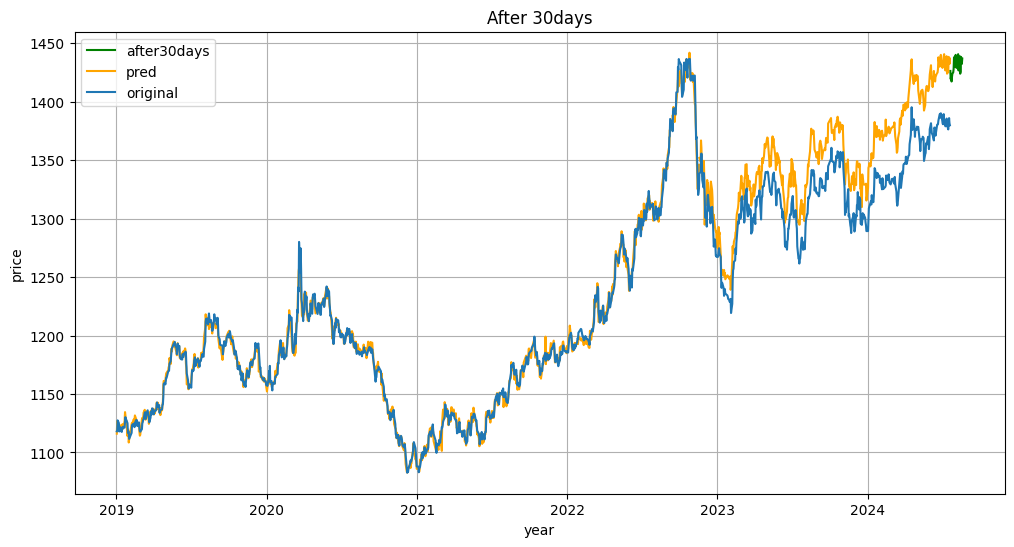

In [ ]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값을 시각화
plt.figure(figsize=(12, 6))

# 예측 결과 그래프
plt.plot(predictions.index, predictions['예측환율_일별'], label='after30days',color='green')

# 실제 검증 데이터와 예측 값 그래프
plt.plot(X_train.index, y_train_pred, label='pred', color='Orange')
plt.plot(X_valid.index, y_valid_pred, color='Orange')
plt.plot(X_test.index, y_test_pred ,color='Orange')
plt.plot(y.index, y, label='original')

# 그래프 제목과 레이블 설정
plt.title('After 30days')
plt.xlabel('year')
plt.ylabel('price')
plt.legend()
plt.grid()
# 그래프 출력
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 및 실제 값 예시 (여기서는 랜덤 데이터를 사용합니다)
y_valid = np.random.rand(274, 1) # 예시로 2차원 배열 생성
y_valid_pred = np.random.rand(274, 1) # 예시로 2차원 배열 생성

# 1차원으로 변환
y_valid = y_valid.flatten()
y_valid_pred = y_valid_pred.flatten()

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
mae = mean_absolute_error(y_valid, y_valid_pred)
r2 = r2_score(y_valid, y_valid_pred)
mape = np.mean((np.abs((y_valid - y_valid_pred) / y_valid)) *100)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")

RMSE: 0.3922438745076542
MAE: 0.31881763058469703
R2: -0.9466423823532117
MAPE: 324.62899704353123


In [ ]:
if isinstance(y_valid, pd.Series):
    y_valid_index = y_valid.index
    y_valid = y_valid.values
else:
    y_valid_index = range(len(y_valid))